In [10]:
%pylab inline --no-import-all

/Users/MeghanFrate/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


In [11]:
import george
from george.kernels import MyDijetKernelSimp

import math
import time
import numpy as np
import scipy.stats as ss
import scipy.special as ssp
import scipy.optimize as op
from iminuit import Minuit

import ROOT as r
from rootpy.plotting import Hist, Hist2D, Legend, Canvas
import rootpy.plotting.root2matplotlib as rplt

### 13 TeV ATLAS dataset 3.6 fb-1. Bin centers, bin widths, and counts. Have 0 count bins removed - GP fails when these are included

In [12]:
#bin center
xval = np.array([1116.5, 1149.5, 
        1183.0, 1217.0, 1251.5, 1287.0, 1323.0, 1359.5, 1397.0, 1435.0, 1473.5, 1513.0, 1553.0, 1593.5, 1635.0, 
        1677.0, 1719.5, 1763.0, 1807.5, 1852.5, 1898.0, 1944.5, 1992.0, 2040.5, 2089.5, 2139.0, 2189.5, 2241.0, 
        2293.5, 2347.0, 2401.5, 2457.0, 2513.5, 2571.0, 2629.5, 2689.0, 2749.5, 2811.0, 2873.5, 2937.0, 3001.5, 
        3067.0, 3133.5, 3201.0, 3270.0, 3340.5, 3412.0, 3484.5, 3558.5, 3634.0, 3710.5, 3788.0, 3867.0, 3947.5, 
        4029.0, 4112.0, 4196.5, 4282.5, 4370.0, 4459.0, 4549.5, 4641.5, 4735.0, 4830.0, 4926.5, 5024.5,
        5226.0, 5329.0, 5434.0, 5541.0, 5761.0, 5874.0, 5989.0, 6985.0])

#bin width
xerr = np.array([33.0, 33.0, 34.0, 34.0, 35.0, 36.0, 36.0, 37.0, 38.0, 
           38.0, 39.0, 40.0, 40.0, 41.0, 42.0, 42.0, 43.0, 44.0, 45.0, 45.0, 46.0, 47.0, 48.0, 49.0, 49.0, 50.0, 
           51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 
           68.0, 70.0, 71.0, 72.0, 73.0, 75.0, 76.0, 77.0, 78.0, 80.0, 81.0, 82.0, 84.0, 85.0, 87.0, 88.0, 90.0,
           91.0, 93.0, 94.0, 96.0, 97.0, 99.0, 102.0, 104.0, 106.0, 108.0, 112.0, 114.0, 116.0, 134.0])
#events
yval = np.array([94818.0, 79694.0, 68785.0, 57904.0, 49639.0, 43560.0, 36824.0, 31977.0, 27754.0, 23474.0, 20189.0,
                 17655.0, 15195.0, 13104.0, 11297.0, 9533.0, 8263.0, 7120.0, 6222.0, 5253.0, 4678.0, 4035.0, 3545.0,
                 2977.0, 2611.0, 2253.0, 1931.0, 1737.0, 1516.0, 1264.0, 1069.0, 958.0, 796.0, 690.0, 632.0, 527.0,
                 446.0, 386.0, 352.0, 296.0, 260.0, 223.0, 191.0, 142.0, 134.0, 120.0, 90.0, 87.0, 76.0, 69.0, 58.0,
                 46.0, 39.0, 29.0, 32.0, 23.0, 18.0, 11.0, 14.0, 10.0, 11.0, 4.0, 6.0, 5.0, 6.0, 2.0, 3.0, 4.0,
                 3.0, 1.0, 1.0, 1.0, 2.0, 1.0])



### 13 TeV ATLAS dataset 3.6 fb-1. Bin centers, bin widths, counts, bin low edge. 

In [13]:
xvalO = np.array([1116.5, 1149.5,1183.0, 1217.0, 1251.5, 1287.0, 1323.0, 1359.5, 1397.0, 1435.0, 1473.5, 1513.0, 
                  1553.0, 1593.5, 1635.0, 1677.0, 1719.5, 1763.0, 1807.5, 1852.5, 1898.0, 1944.5, 1992.0, 2040.5,
                  2089.5, 2139.0, 2189.5, 2241.0, 2293.5, 2347.0, 2401.5, 2457.0, 2513.5, 2571.0, 2629.5, 2689.0, 
                  2749.5, 2811.0, 2873.5, 2937.0, 3001.5, 3067.0, 3133.5, 3201.0, 3270.0, 3340.5, 3412.0, 3484.5, 
                  3558.5, 3634.0, 3710.5, 3788.0, 3867.0, 3947.5, 4029.0, 4112.0, 4196.5, 4282.5, 4370.0, 4459.0, 
                  4549.5, 4641.5, 4735.0, 4830.0, 4926.5, 5024.5, 5124.5, 5226.0, 5329.0, 5434.0, 5541.0, 5650.0, 
                  5761.0, 5874.0, 5989.0, 6106.0, 6225.0, 6346.0, 6469.0, 6594.5, 6722.5, 6852.5, 6985.0])
xerrO = np.array([33.0, 33.0, 34.0, 34.0, 35.0, 36.0, 36.0, 37.0, 38.0, 38.0, 39.0, 40.0, 40.0, 41.0, 42.0, 42.0, 
                  43.0, 44.0, 45.0, 45.0, 46.0, 47.0, 48.0, 49.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 
                  57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 70.0, 71.0, 72.0, 73.0, 
                  75.0, 76.0, 77.0, 78.0, 80.0, 81.0, 82.0, 84.0, 85.0, 87.0, 88.0, 90.0, 91.0, 93.0, 94.0, 96.0,
                  97.0, 99.0, 101.0, 102.0, 104.0, 106.0, 108.0, 110.0, 112.0, 114.0, 116.0, 118.0, 120.0, 122.0,
                  124.0, 127.0, 129.0, 131.0, 134.0])

yvalO =np.array([94818.0, 79694.0, 68785.0, 57904.0, 49639.0, 43560.0, 36824.0, 31977.0, 27754.0, 23474.0, 20189.0,
                 17655.0, 15195.0, 13104.0, 11297.0, 9533.0, 8263.0, 7120.0, 6222.0, 5253.0, 4678.0, 4035.0, 3545.0,
                 2977.0, 2611.0, 2253.0, 1931.0, 1737.0, 1516.0, 1264.0, 1069.0, 958.0, 796.0, 690.0, 632.0, 527.0,
                 446.0, 386.0, 352.0, 296.0, 260.0, 223.0, 191.0, 142.0, 134.0, 120.0, 90.0, 87.0, 76.0, 69.0, 58.0,
                 46.0, 39.0, 29.0, 32.0, 23.0, 18.0, 11.0, 14.0, 10.0, 11.0, 4.0, 6.0, 5.0, 6.0, 2.0, 0.0, 3.0, 4.0,
                 3.0, 1.0, 0.0, 1.0, 1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0])

xlowO = [1100.0, 1133.0, 1166.0, 1200.0, 1234.0, 1269.0, 1305.0, 1341.0, 1378.0, 1416.0, 1454.0, 1493.0, 
                  1533.0, 1573.0, 1614.0, 1656.0, 1698.0, 1741.0, 1785.0, 1830.0, 1875.0, 1921.0, 1968.0, 2016.0, 
                  2065.0, 2114.0, 2164.0, 2215.0, 2267.0, 2320.0, 2374.0, 2429.0, 2485.0, 2542.0, 2600.0, 2659.0, 
                  2719.0, 2780.0, 2842.0, 2905.0, 2969.0, 3034.0, 3100.0, 3167.0, 3235.0, 3305.0, 3376.0, 3448.0,
                  3521.0, 3596.0, 3672.0, 3749.0, 3827.0, 3907.0, 3988.0, 4070.0, 4154.0, 4239.0, 4326.0, 4414.0,
                  4504.0, 4595.0, 4688.0, 4782.0, 4878.0, 4975.0, 5074.0, 5175.0, 5277.0, 5381.0, 5487.0, 5595.0,
                  5705.0, 5817.0, 5931.0, 6047.0, 6165.0, 6285.0, 6407.0, 6531.0, 6658.0, 6787.0, 6918.0, 7052.0]

### Save inputs as numpy arrays

In [6]:
np.save("xvalO",xvalO)
np.save("yvalO", yvalO)
np.save("xerrO", xerrO)
np.save("xlowO", xlowO)
np.save("xval",xval)
np.save("yval", yval)
np.save("xerr", xerr)

### Gaussian signal function

In [14]:
def sig_model(x, N=1e5, mass=2000., width=100., xErr=xerr):
    return N*(np.exp(-(x-mass)**2/2/width/width)/np.sqrt(2*np.pi)/width)*xErr

### 3 parameter and 5 parameter fit function

In [15]:
def model_3param(t, params, xErr=xerr): 
    p0, p1, p2 = params
    sqrts = 13000.
    return (p0 * ((1.-t/sqrts)**p1) * (t/sqrts)**(p2))*(xErr)  

def model_5param(t, params, xErr=xerr): 
    p0, p1, p2, p3, p4 = params
    sqrts = 13000.
    return (p0 * ((1.-t/sqrts)**p1) * (t/sqrts)**(p2+p3*np.log(t/sqrts)+p4*np.log(t/sqrts)**2))*(xErr)

### Calculate z values. Shown on bottom panel of plots

In [16]:
def calcSignificance(Data, Bkg):
    pvals = []
    zvals = []
    chi2 = 0
    for i, nD in enumerate(Data):
        nB = Bkg[i]
        if nD != 0:
            if nB > nD:
                pval = 1.-ssp.gammainc(nD+1.,nB)
            else:
                pval = ssp.gammainc(nD,nB)
            prob = 1-2*pval
            if prob > -1 and prob < 1:
                zval = math.sqrt(2.)*ssp.erfinv(prob)
            else:
                zval = np.inf
               
            if zval > 100: zval = 20
            if zval < 0: zval = 0
            if (nD < nB): zval = -zval
        else: zval = 0
            
        zvals.append(zval)
        chi2 += ((nD - nB) ** 2 / abs(nB))
    return zvals, chi2

### Poisson log likelihood

In [1]:
def simpleLogPoisson(x, par):
    if x < 0: 
        return np.inf
    elif (x == 0): return -1.*par
    else:
        lnpoisson = x*np.log(par)-par-ssp.gammaln(x+1.)
        return lnpoisson

### Make toys: take 5 parameter fit to data and add Poisson noise

In [2]:
def makeToys(dataset, nPseudo=1000, lumi = 3.6):
    toys = []
    for n in range(nPseudo):
        pseudo = np.random.poisson(dataset*lumi/3.6)
        toys.append(pseudo)
    return toys

### remove zero count bins to use for GP fits

In [3]:
def removeZeros(data):
    indices = [i for i, y in enumerate(data) if y == 0]
    newylist=[]
    newxlist=[]
    newxerrlist=[]
    for k in range(len(data)):
        if k not in indices:
            newylist.append(data[k])
            newxlist.append(xvalO[k])
            newxerrlist.append(xerrO[k])
    return np.array(newylist), np.array(newxlist), np.array(newxerrlist)

### Make plot with fit overlaid on data on top panel, signficance on bottom panel

In [4]:
def makePrettyPlots(xs, ys, bkgs, title, col = 'g', ymax = 2e5):
    f, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(12,12), gridspec_kw = {'height_ratios':[3, 1]})
    f.suptitle(title, fontsize=30)
    dataPlot = ax1.errorbar(xs, ys, marker='o', ls='None', yerr = np.sqrt(ys), c='black', markersize=10, label="data+signal")
    bkgPlot, =ax1.plot(xs, bkgs, color=col, linewidth=3.0, label="bkg only")
    ax1.legend()
    ax1.set_ylabel('Events', fontsize=20)
    ax1.tick_params(axis='y', labelsize=20)
    ax1.set_yscale('log', nonposy="clip")
    ax1.set_xscale('log')
    ax1.set_xlim([1000, 7500])
    ax1.set_ylim([0.01, ymax])

  
    #bin by bin significance    
    zvals, chi2 = calcSignificance(ys, bkgs)
    print "chi2", chi2
    sigHist = Hist(xlowO,markersize=0)
    for x in range(len(zvals)):
        if zvals[x] == np.inf or zvals[x] == -np.inf: sigHist[x] = 20
        else: sigHist[x] = zvals[x]  

    
    sigHist.fillstyle = 'solid'
    if col == 'g':
         sigHist.fillcolor = 'green'
    elif col == 'b':
         sigHist.fillcolor = 'blue'
    elif col == 'r':
         sigHist.fillcolor = 'red'
    else:
        sigHist.fillcolor = 'black'
    sigHist.linecolor = 'black'
    sigHist.linewidth = 1
    sigHist.Draw("histX0")
    rplt.bar(sigHist, xerr=None, yerr=None)
    ax2.axhline(0, color='black', lw=1)
    ax2.tick_params(axis='x', labelsize=20)
    ax2.tick_params(axis='y', labelsize=20)
    ax2.set_xlabel(r"$m_{jj}$ [TeV]", fontsize=30)
    ax2.set_ylabel('Significance', fontsize=20)
    ax2.set_xscale('log')
    ax2.set_xlim([1000, 7500])
    ax2.set_xticks([1000, 2000, 3000, 4000, 5000, 6000, 7000])
    ax2.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    minor_ticks = np.arange(1000, 7500, 100)
    ax2.set_xticks(minor_ticks, minor=True)  
    labels = ["1","2","3","4","5","6","7"]
    ax2.set_xticklabels(labels)
    ax2.set_ylim([-5, 5])
    
    f.subplots_adjust(hspace=0)
    plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)    
    plt.show()


### Make plot with GP and background fit overlaid on data on top panel, middle panel significance of GP, bottom panel signficance of fit function

In [5]:
def makePrettyPlots_compare(xs, ys, bkggp, bkgff, title, ymax = 2e5):
    f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, figsize=(12,12), gridspec_kw = {'height_ratios':[3, 1, 1]})
    f.suptitle(title, fontsize=30)
    dataPlot = ax1.errorbar(xs, ys, marker='o', ls='None', yerr = np.sqrt(ys), c='black', markersize=10, label="Data")
    bkg1Plot, = ax1.plot(xs, bkggp, color='g', linewidth=3.0, label="Gaussian Process")
    bkg2Plot, = ax1.plot(xs, bkgff, color='b', linewidth=3.0, label="3 Parameter Fit Function")
    ax1.legend()
    ax1.set_ylabel('Events', fontsize=20)
    ax1.set_yscale('log', nonposy="clip")
    ax1.set_xscale('log')
    ax1.set_xlim([1000, 7500])
    ax1.set_ylim([0.3, ymax])
    ax1.tick_params(axis='y', labelsize=20)

    #bin by bin significance   
    zvals_gp, chi2_gp = calcSignificance(ys, bkggp)
    print "chi2 bkg+signal mu=0", chi2_gp
    sigHist_gp = Hist(xlowO,markersize=0)
    for x in range(len(zvals_gp)):
        if zvals_gp[x] == np.inf or zvals_gp[x] == -np.inf: sigHist_gp[x] = 20
        else: sigHist_gp[x] = zvals_gp[x]  
    sigHist_gp.fillstyle = 'solid'
    sigHist_gp.fillcolor = 'green'
    sigHist_gp.linecolor = 'black'
    sigHist_gp.linewidth = 1
    sigHist_gp.Draw("histX0")

    rplt.bar(sigHist_gp, xerr=None, yerr=None, axes=ax2)
    ax2.axhline(0, color='black', lw=1)
    ax2.set_ylabel('Significance', fontsize=20)
    ax2.set_xscale('log')
    ax2.tick_params(axis='y', labelsize=20)
    ax2.set_xlim([1000, 7500])
    ax2.set_ylim([-5, 5])


    zvals_ff, chi2_ff = calcSignificance(ys, bkgff)
    print "chi2 bkg+signal", chi2_ff
    sigHist_ff = Hist(xlowO,markersize=0)
    for x in range(len(zvals_ff)):
        if zvals_ff[x] == np.inf or zvals_ff[x] == -np.inf: sigHist_ff[x] = 20
        else: sigHist_ff[x] = zvals_ff[x]  
    sigHist_ff.fillstyle = 'solid'
    sigHist_ff.fillcolor = 'blue'
    sigHist_ff.linecolor = 'black'
    sigHist_ff.linewidth = 1
    sigHist_ff.Draw("histX0")
    rplt.bar(sigHist_ff, xerr=None, yerr=None, axes=ax3)
    ax3.axhline(0, color='black', lw=1)
    ax3.set_xlabel(r"$m_{jj}$ [TeV]", fontsize=30)
    ax3.set_ylabel('Significance', fontsize=20)
    ax3.set_xscale('log')
    ax3.tick_params(axis='y', labelsize=20)
    ax3.tick_params(axis='x', labelsize=20)
    ax3.set_ylim([-5, 5])
    ax3.set_xlim([1000, 7500])
    

    ax3.set_xticks([1000, 2000, 3000, 4000, 5000, 6000, 7000])
    ax3.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    minor_ticks = np.arange(1000, 7500, 100)
    ax3.set_xticks(minor_ticks, minor=True)  
    labels = ["1","2","3","4","5","6","7"]
    ax3.set_xticklabels(labels)
    
    f.subplots_adjust(hspace=0)
    plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)    
    plt.show()


### Poisson likelihood for 3 and 5 parameter fit functions

In [6]:
class logLike_3ff:
    def __init__(self, x, y, xe):
        self.x = x
        self.y = y
        self.xe = xe
    def __call__(self, p0, p1, p2):
        params = p0, p1, p2
        bkgFunc = model_3param(self.x, params, self.xe)       
        logL = 0
        for ibin in range(len(self.y)):
            data = self.y[ibin]
            bkg = bkgFunc[ibin]
            logL += -simpleLogPoisson(data, bkg)
        try:
            logL
            return logL
        except:
            return np.inf


class logLike_5ff:
    def __init__(self, x, y, xe):
        self.x = x
        self.y = y
        self.xe = xe
    def __call__(self, p0, p1, p2, p3, p4):
        params = p0, p1, p2, p3, p4
        bkgFunc = model_5param(self.x, params, self.xe)       
        logL = 0
        for ibin in range(len(self.y)):
            data = self.y[ibin]
            bkg = bkgFunc[ibin] 
            logL += -simpleLogPoisson(data, bkg)
        try:
            logL
            return logL
        except:
            return np.inf

### Minuit minimization of 3 and 5 parameter fit functions. minimize negative log likelihood, return minimum negative log likelihood and fit parameters corresponding to minimum. 

In [7]:
def fit_3ff(num,lnprob, Print=True):
    minLLH = np.inf
    best_fit_params = (0., 0., 0.)
    for i in range(num):
        init0 = np.random.random() * 1.
        init1 = np.random.random() * 8.
        init2 = np.random.random() * 6.
        m = Minuit(lnprob, throw_nan = False, pedantic = False, print_level = 0,
                  p0 = init0, p1 = init1, p2 = init2,
                  error_p0 = 1e-2, error_p1 = 1e-1, error_p2 = 1e-1, 
                  limit_p0 = (0, 100.), limit_p1 = (-100., 100.), limit_p2 = (-100., 100.))
        m.migrad()
        if m.fval < minLLH:
            minLLH = m.fval
            best_fit_params = m.args 
    if Print:
        print "min LL", minLLH
        print "best fit vals", best_fit_params
    return minLLH, best_fit_params


def fit_5ff(num,lnprob, Print = True):
    minLLH = np.inf
    best_fit_params = (0., 0., 0., 0., 0.)
    for i in range(num):
        init0 = np.random.random() * 1.
        init1 = np.random.random() * 8.
        init2 = np.random.random() * 6.
        init3 = np.random.random() * 1.
        init4 = np.random.random() * 1.
        m = Minuit(lnprob, throw_nan = False, pedantic = False, print_level = 0,
                  p0 = init0, p1 = init1, p2 = init2, p3 = init3, p4 = init4,
                  error_p0 = 1e-2, error_p1 = 1e-1, error_p2 = 1e-1, error_p3 = 1e-2, error_p4 = 1e-2,
                  limit_p0 = (0, 10), limit_p1 = (-20, 20), limit_p2 = (-20, 20), 
                   limit_p3 = (-20, 20), limit_p4 = (0, 50))
        m.migrad()
        if m.fval < minLLH:
            minLLH = m.fval
            best_fit_params = m.args 
    if Print:
        print "min LL",minLLH
        print "best fit vals", best_fit_params
    return minLLH, best_fit_params

### mean function for GP - 3 parameter fit function. negative log likelihood for Gaussian Process - from george. Minuit minimzation for GP negative log likelihood. Return minimum log likelihood and hyperparameters and mean parameters corresponding to this minimum.

In [17]:
def model_gp(params, t, xerr=xerr): 
    p0, p1, p2 = params
    sqrts = 13000.
    return (p0 * (1.-t/sqrts)**p1 * (t/sqrts)**(p2))*xerr

class logLike_gp:
    def __init__(self, x, y, xerr):
        self.x = x
        self.y = y
        self.xerr = xerr
    def __call__(self, Amp, decay, length, power, sub, p0, p1, p2):
        kernel = Amp * MyDijetKernelSimp(a = decay, b = length, c = power, d = sub)
        gp = george.GP(kernel)
        try:
            gp.compute(self.x, np.sqrt(self.y))
            return -gp.lnlikelihood(self.y - model_gp((p0,p1,p2), self.x, self.xerr))
        except:
            return np.inf
        
def fit_gp_minuit(num, lnprob):
    minLLH = np.inf
    best_fit_params = (0, 0, 0, 0, 0, 0, 0, 0)
    for i in range(num):
        init0 = np.random.random() * 1e6+1
        init1 = np.random.random() * 400.
        init2 = np.random.random() * 10. 
        init3 = np.random.random() * -100.
        init4 = np.random.random() * 650.
        init5 = np.random.random() * 1.
        init6 = np.random.random() * 1.
        init7 = np.random.random() * -1.
        m = Minuit(lnprob, throw_nan = False, pedantic = False, print_level = 0,
                  Amp = init0, decay = init1, length = init2, power = init3, sub = init4, 
                   p0 = init5, p1 = init6, p2 = init7,
                  error_Amp = 1e1, error_decay = 1e1, error_length = 1e-1, error_power = 1e-1, 
                   error_sub = 1e-1, error_p0 = 1e-2, error_p1 = 1e-2, error_p2 = 1e-2,
                  limit_Amp = (1, 1e15), limit_decay = (0, 500), limit_length = (0, 200), 
                   limit_power = (-200, 200), limit_sub = (0, 1000), limit_p0 = (0,10), 
                   limit_p1 = (0, 10), limit_p2 = (-10,0)) 
        m.migrad()
        if m.fval < minLLH:
            minLLH = m.fval
            best_fit_params = m.args 
    print "min LL", minLLH
    print "best fit vals",best_fit_params
    return minLLH, best_fit_params

### Fit GP to data only (fixed hyperparameters set here)

In [18]:
lnProb = logLike_gp(xval,yval, xerr)
minimumLLH, best_fit_hyperparams = fit_gp_minuit(100, lnProb)
fixedHyperparams = best_fit_hyperparams
print "hyperparams", fixedHyperparams
Amp, decay, length, power, sub, p0, p1, p2 = best_fit_hyperparams
kernel = Amp * MyDijetKernelSimp(a = decay, b = length, c = power, d=sub)
gp = george.GP(kernel)
gp.compute(xval, np.sqrt(yval))
meanGP, covGP = gp.predict(yval - model_gp(best_fit_hyperparams[5:],xval, xerr), xvalO)
meanGPnom = meanGP + model_3param(xvalO,best_fit_hyperparams[5:],xerrO)

min LL 310.696327069
best fit vals (304177.73935190204, 52.361991508381166, 170.66556987030177, -139.1552217490787, 56.536951201071496, 0.016613480362987487, 8.463356685241994, -5.2225269599793664)
hyperparams (304177.73935190204, 52.361991508381166, 170.66556987030177, -139.1552217490787, 56.536951201071496, 0.016613480362987487, 8.463356685241994, -5.2225269599793664)


chi2 65.5719476321


/Users/MeghanFrate/anaconda2/lib/python2.7/site-packages/IPython/core/formatters.py:92: DeprecationWarning: DisplayFormatter._ipython_display_formatter_default is deprecated: use @default decorator instead.
  def _ipython_display_formatter_default(self):
/Users/MeghanFrate/anaconda2/lib/python2.7/site-packages/IPython/core/formatters.py:669: DeprecationWarning: PlainTextFormatter._singleton_printers_default is deprecated: use @default decorator instead.
  def _singleton_printers_default(self):


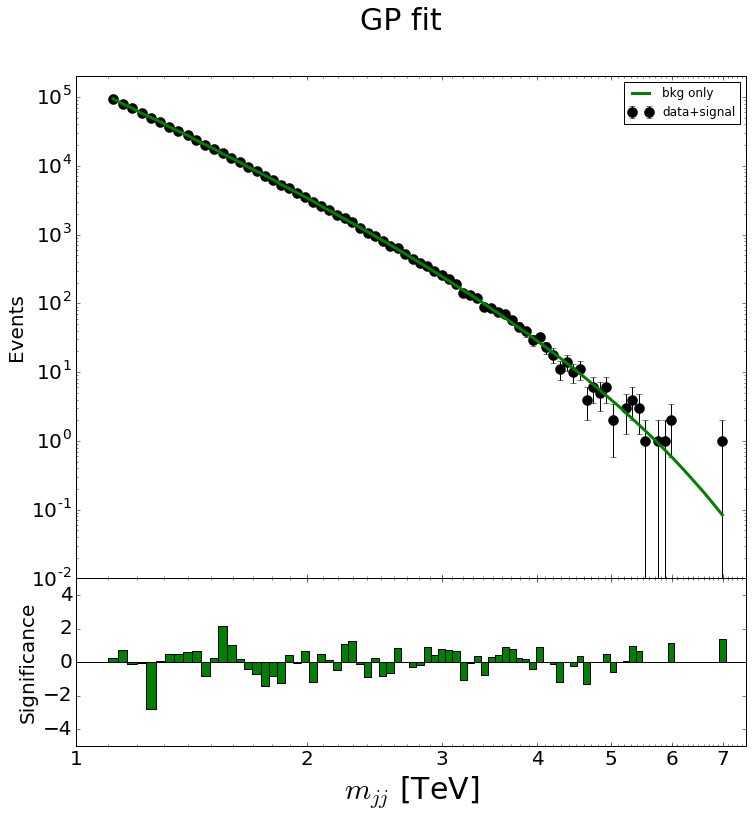

In [19]:
label = "GP fit"
makePrettyPlots(xvalO, yvalO, meanGPnom, label)

### 3 parameter fit

min LL 318.093381581
best fit vals (0.016090833018872486, 8.383017838210051, -5.232690690010571)
(0.016090833018872486, 8.383017838210051, -5.232690690010571)
chi2 64.6650584535


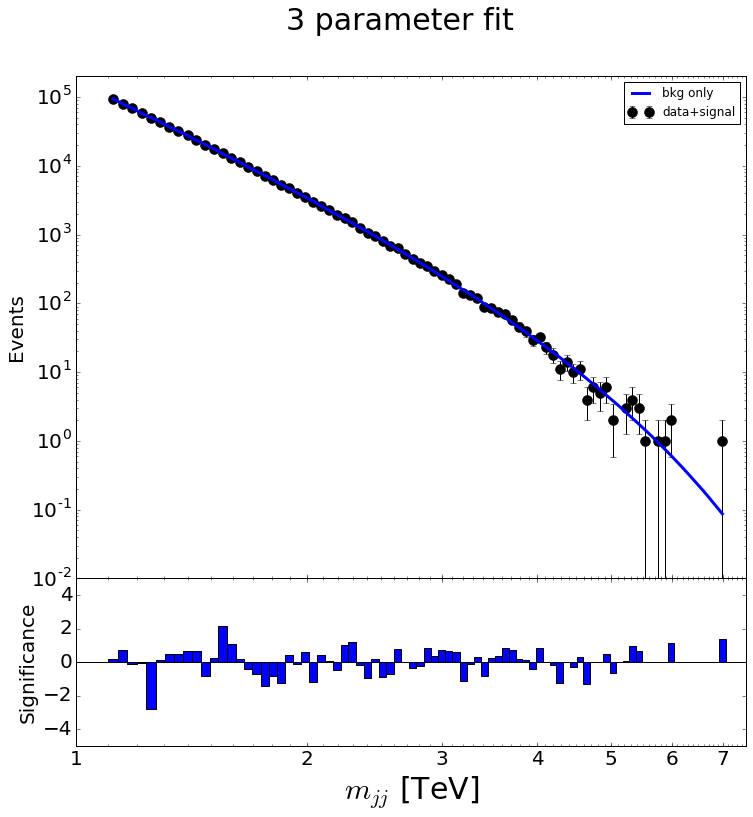

In [20]:
lnProb = logLike_3ff(xvalO,yvalO,xerrO)
minimumLLH, best_fit_params = fit_3ff(100, lnProb)
bkg3param = model_3param(xvalO, best_fit_params, xerrO)
print best_fit_params
label = "3 parameter fit"
makePrettyPlots(xvalO, yvalO, bkg3param, label, 'b')

### 5 parameter fit

/Users/MeghanFrate/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in log


min LL 318.043380771
best fit vals (0.12201628248271146, 9.976654974613055, -3.347082190379762, 0.6634658966960387, 0.08466365951445842)
chi2 66.5949541706


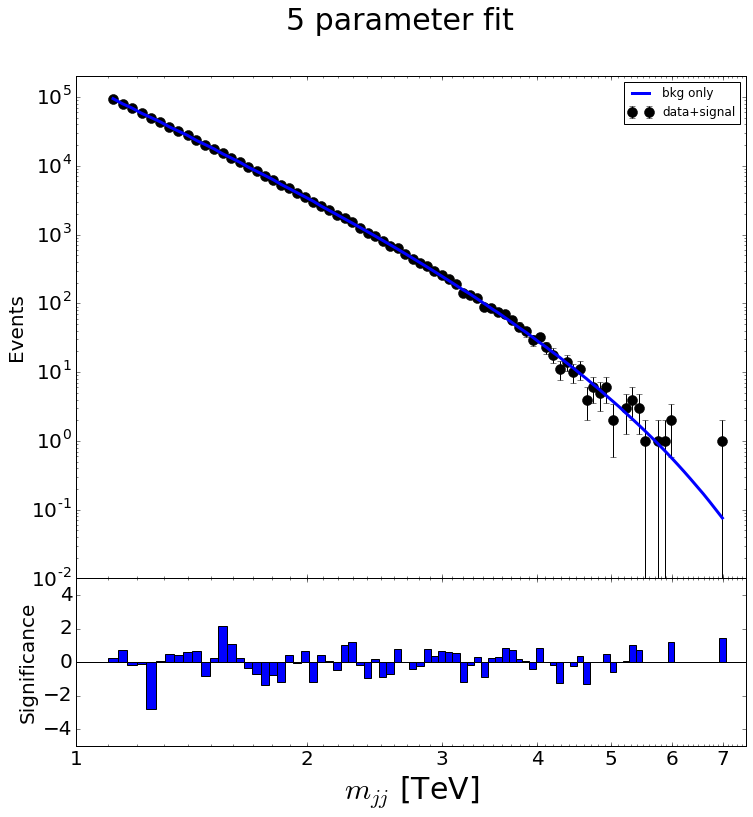

In [21]:
lnProb = logLike_5ff(xvalO,yvalO,xerrO)
minimumLLH, best_fit_params = fit_5ff(100, lnProb)
bkg5param = model_5param(xvalO, best_fit_params, xerrO)
label = "5 parameter fit"
makePrettyPlots(xvalO, yvalO, bkg5param, label, 'b')

chi2 bkg+signal mu=0 65.5719476321
chi2 bkg+signal 66.5949541706


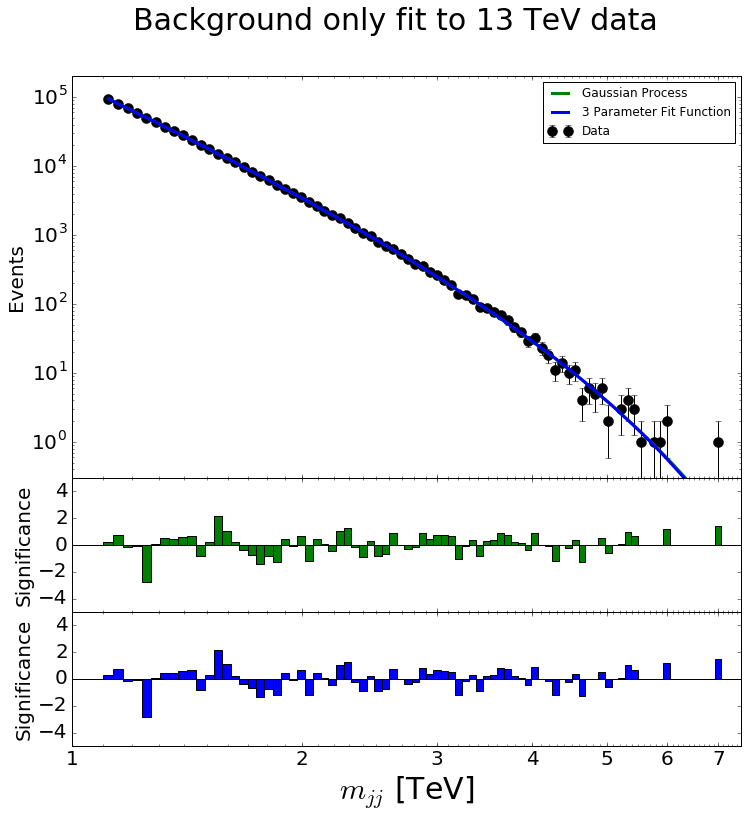

In [22]:
label = "Background only fit to 13 TeV data"
makePrettyPlots_compare(xvalO, yvalO, meanGPnom, bkg5param, label)

### Create and save toys, toys at different luminosites, GP fit to data, and hyperparameters from GP fit to daa

In [21]:
toyList = makeToys(bkg5param, 10000)
lumiList = [5., 10., 15., 20., 25., 30., 35., 40., 45., 50.]
lumiToyDict={}
for lum in lumiList:
    lumiToyDict[lum] = makeToys(bkg5param, 10000, lum)
standardParamSets = [(1500,2000,250), (750 ,2500, 250), (200, 3000, 250), (75, 3500, 250), (50, 4000, 250), 
             (25, 4500, 250), (20, 5000, 250), (15,5500, 250), (15, 6000,250)]
np.save("toyList",toyList)
np.save("lumiToyList", lumiToyDict)
np.save("initialGPfit", meanGPnom)
np.save("fixedHyperparams", fixedHyperparams)

### create Gaussian signals and add Poisson noise for the same number of toy data sets

In [23]:
sigDict={}
sigDictO={}
for pSet in standardParamSets:
    n, m, w = pSet
    sigDict[m]=[]
    sigDictO[m]=[]
    for itoy, toy in enumerate(toyList):    
        ytoy, xtoy, xtoyerr = removeZeros(toy)
        signalTemplate = sig_model(xtoy, n, m, w, xtoyerr)
        signalTemplate = np.random.poisson(np.around(signalTemplate))
        sigDict[m].append(signalTemplate)
        
        signalTemplateO = sig_model(xvalO, n, m, w, xerrO)
        signalTemplateO = np.random.poisson(np.around(signalTemplateO))
        sigDictO[m].append(signalTemplateO)

np.save("signalToys", sigDict)
np.save("signalToysO", sigDictO)